In this jupyter notebook file we will look at the correlation between various features in order to outline some predictive findings in relation to the fatality rate of patients

We will need to import some libraries which are the following

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df_clean = pd.read_csv('Covid19_Analysis_Ready.csv')


In [21]:
df_clean.dtypes

case_month                          object
age_group                           object
sex                                 object
race                                object
case_positive_specimen_interval    float64
case_onset_interval                float64
current_status                      object
symptom_status                      object
hosp_yn                             object
death_yn                            object
dtype: object

In [22]:
df_clean['case_month'] = df_clean['case_month'].astype('category')
df_clean['age_group'] = df_clean['age_group'].astype('category')
df_clean['sex'] = df_clean['sex'].astype('category')
df_clean['race'] = df_clean['race'].astype('category')
df_clean['current_status'] = df_clean['current_status'].astype('category')
df_clean['symptom_status'] = df_clean['symptom_status'].astype('category')
df_clean['hosp_yn'] = df_clean['hosp_yn'].astype('category')
df_clean['death_yn'] = df_clean['death_yn'].astype('category')


In [23]:
df_clean.dtypes

case_month                         category
age_group                          category
sex                                category
race                               category
case_positive_specimen_interval     float64
case_onset_interval                 float64
current_status                     category
symptom_status                     category
hosp_yn                            category
death_yn                           category
dtype: object

Let's check to see what features would be interesting to compare to one another, and what we may expect or look to gain from each comparison

First let's start with comparing the patient's age range with whether there were more deaths among a certain age bracket.

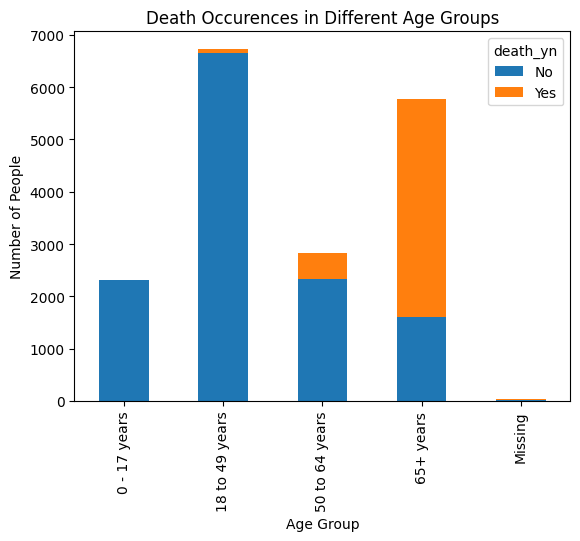

In [24]:
df_clean.groupby(['age_group', 'death_yn']).size().unstack().plot(kind='bar', stacked=True)
plt.ylabel('Number of People')
plt.xlabel('Age Group')
plt.title('Death Occurences in Different Age Groups')
plt.show()

So as we can see from the graph above is that the proportion of people who died in a given age bracket is very high when it comes to people over the age of 65. This is understandable as people of higher ages tend not to have the best immune system to fight off sicknesses. COVID did not have the same effect of mortality on those of younger ages, however we can see the slow increase in deaths from ages 18 up to 64. 


Further to our analysis, it would be worthwhile examining if there was any significant data surrounding the proportion of men and women who died from COVID, and whether one sex is more likely to pass away at higher rates than the other

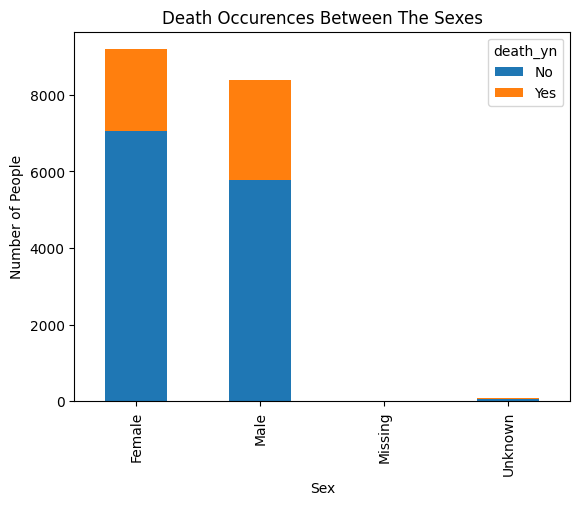

In [25]:
df_clean.groupby(['sex', 'death_yn']).size().unstack().plot(kind='bar', stacked=True)
plt.ylabel('Number of People')
plt.xlabel('Sex')
plt.title('Death Occurences Between The Sexes')
plt.show()

The graph above shows that there is no significant disparity between mortality rates of males and females. The dataset used in this analysis shows a slightly higher number of women, but this wouldn't effect the results in any way. Both males and females appear to have the same mortality rate of their overall population


We could have a look at something similar but this time instead of Sex, Race.

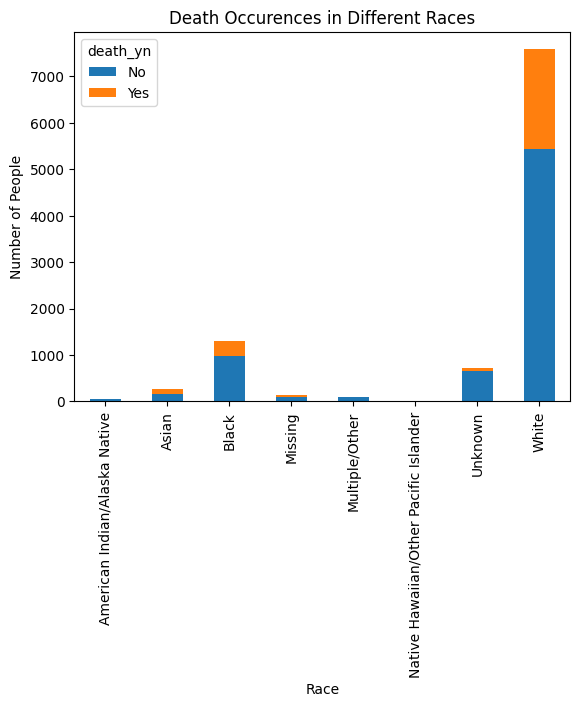

In [33]:
df_clean.groupby(['race', 'death_yn']).size().unstack().plot(kind='bar', stacked=True)
plt.ylabel('Number of People')
plt.xlabel('Race')
plt.title('Death Occurences in Different Races')
plt.show()

Once again, there doesn't seem to be anything of note here

It would be beneficial to us to chart out the number of people who reported symptoms throughout the months that the dataset provides us. This would be a great way to notice any seasonal patterns.

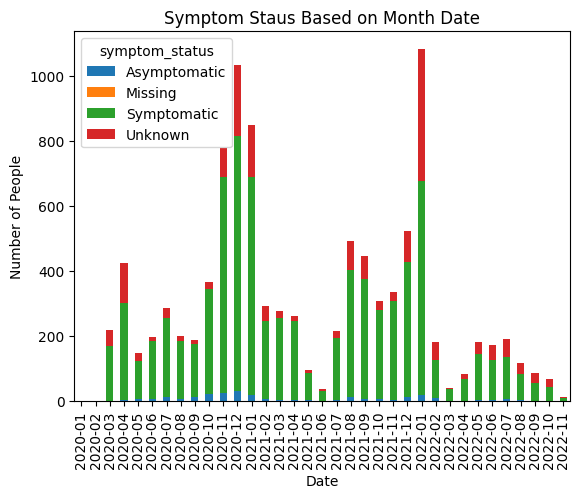

In [32]:
# In order to remove the values of missing, we do this below.
df_clean = df_clean[df_clean['symptom_status'] != 'Missing']



df_clean.groupby(['case_month', 'symptom_status']).size().unstack().plot(kind='bar', stacked=True)
plt.ylabel('Number of People')
plt.xlabel('Date')
plt.title('Symptom Staus Based on Month Date')
plt.show()

Now this data is very interesting. We did have a high number of missing values in regards to this feature, but removing them still paints an intreguring result. We see spikes in the graph of patients recorded as being symptomatic at certain points on the date timeline. These large spiked tend to be concentrated on the month of November, December, and January. This is then followed by lower numbers in the spring and summer time. This could be due to colds and other illnesses being highly prevalent during the winter months and COVID compromising people when there immune system is already very weak. What could also be another cause for a lull in reporting around spring time is the coinciding with allergy season. It is a possibility that people who felt the symptoms of COVID during these months could have mistook them for allergies or other factors due to the changing of the season.

Next idea, current status and sex

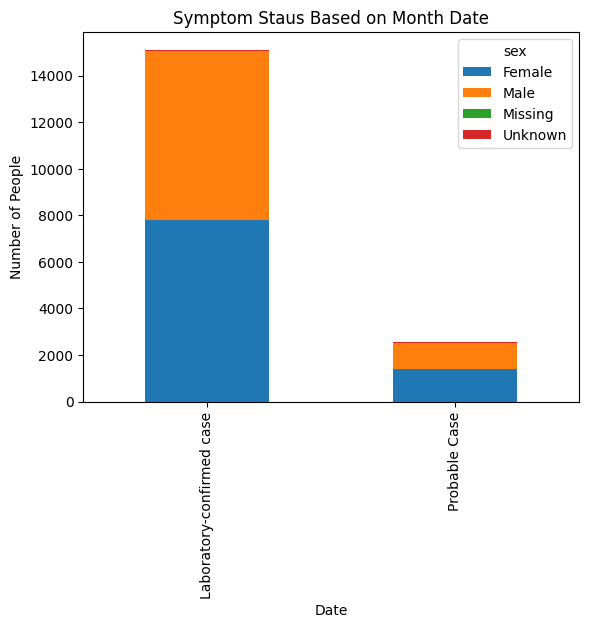

In [26]:
df_clean.groupby(['current_status', 'sex']).size().unstack().plot(kind='bar', stacked=True)
plt.ylabel('Number of People')
plt.xlabel('Current Status')
plt.title('Current Status Based on Sex')
plt.show()

The findings here don't seem to be hugley indicative of anything, moreso demonstrates that throughout the dataset that both male and female patients seem to be evenly split among their current status

Symptom Status and Sex

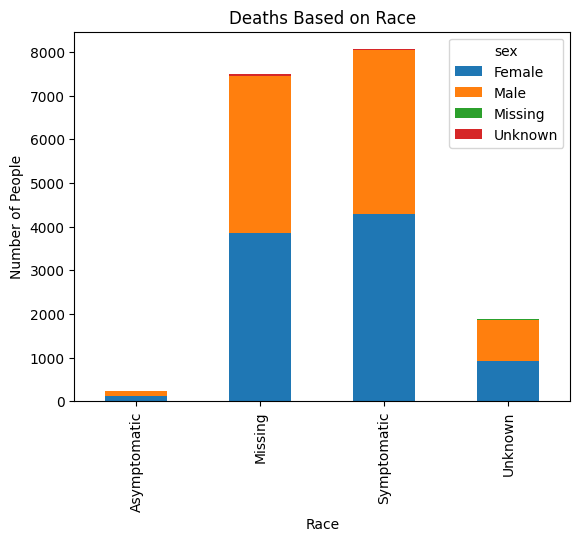

In [31]:
df_clean.groupby(['symptom_status', 'sex']).size().unstack().plot(kind='bar', stacked=True)
plt.ylabel('Number of People')
plt.xlabel('Race')
plt.title('Symptom Status Based on Sex')
plt.show()

Once again, there is nothing to show correlation of any particular trend when we compare these two features.

With the target outcome centered around death risk prediction, there are a number of points we can make after having analysed the data. Which are the following:
1. The risk of death is much higher in older patients. We examined this in our first chart.
2. The reporting of symptomatic covid cases seem to center around the colder months, primarily in the season of Winter
3. There doesn't seem to be any link to a certain sex or race that would lead them to be more at risk of dying from COVID

What can we infer from these findings? It seems as though if we were to build a data analytics solution for death risk prediction, we could make the following statement. COVID patients are more at risk of contracting the virus around winter months, and the most at risk age group of passing away fromt the virus are the elderly. Other factors relating to patients including race or sex seem to have no impact on their ability to survive COVID or not.